# Predicting defaults on Lending Club database


- Authors: Beltrán Aller López and Miguel López Garralón
- Date: 13/12/2019
- Email: beltran.aller@cunef.edu and m.lopez@cunef.edu
- Institution: CUNEF
- Version: 1.0

The main purpose of this project will be predict if a client of the Lending Club will do a default or will no do it. In order to get that, we are going to explore the dataset, analise the data and try to make a predictive model.

The steps are the following:

* Reading the data.
* Showing a little part of the data in order to get some knowledge about them.
* Choosing the most important variables of the dataset according to the Lending Club Dictionary and our own inquiries into the web.
* Filtering the data.
* Doing an exploratory data analysis.
* Making a predictive model.

Before doing anything, we will import the necessaries libraries.

In [2]:
# Libraries

import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt # plots
import seaborn as sns # plots
from scipy import stats as sts # normality test JB
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split # split data
from sklearn.metrics import mean_squared_error # MSE
from sklearn.preprocessing import StandardScaler 
from sklearn import preprocessing # estandarization
from sklearn.ensemble import IsolationForest # outliers
from math import sqrt # sqrt
import itertools # aplanar arrays
import math
import random
random.seed(1122019)

The following variable indicates the route in which we have our dataset.

In [3]:
data_path = '../data/EDA_set.csv'

## 1. READING THE DATA

The dataset is kept into the data directory. In the same folder you can find the data dictionary.

In [4]:
loan = pd.read_csv(data_path)

In [5]:
loan.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,target
0,NaN,NaN,19875,19875,19850.0,60 months,20.20,528.79,E,E3,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0
1,NaN,NaN,4000,4000,4000.0,36 months,9.17,127.52,B,B1,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0
2,NaN,NaN,10000,10000,10000.0,36 months,7.90,312.91,A,A4,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0
3,NaN,NaN,3500,3500,3500.0,36 months,10.47,113.71,B,B2,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0
4,NaN,NaN,12250,12250,12250.0,60 months,26.99,373.99,F,F3,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
5,NaN,NaN,20000,20000,20000.0,36 months,13.98,683.36,C,C3,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
6,NaN,NaN,13600,13600,13600.0,36 months,16.99,484.81,D,D1,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
7,NaN,NaN,10000,10000,10000.0,36 months,8.38,315.12,B,B1,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0
8,NaN,NaN,21600,21600,21600.0,36 months,8.90,685.87,A,A5,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0
9,NaN,NaN,20000,20000,20000.0,36 months,15.05,693.80,C,C4,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0


## 2. FILTERING DATA

We want to keep the biggest number of variables at the beggining, because the more number of variables you have, the more possibilities you have to generate a better prediction model. In order to continue with that philosophy, we will only delete the variables with a percentage over the 95%.

In [7]:
NaN = pd.DataFrame(round(loan.isnull().sum()/len(loan.index)*100,2),columns=['null_percent'])

In [7]:
Filtro = NaN['null_percent']>95
Nulls = NaN[Filtro]
loan_filtered = loan.drop(list(Nulls.index), axis=1)

We check the dimension of the dataset.

In [8]:
loan_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Columns: 106 entries, loan_amnt to target
dtypes: float64(79), int64(5), object(22)
memory usage: 808.7+ MB


The percentage of NaN is the following.

In [9]:
percentage_NaN = loan_filtered.apply(lambda x: sum(x.isna()/len(loan_filtered)))
percentage_NaN.sort_values(ascending = False).head(40)

desc                              0.905674
mths_since_last_record            0.829081
mths_since_recent_bc_dlq          0.762649
mths_since_last_major_derog       0.736670
mths_since_recent_revol_delinq    0.665349
il_util                           0.659961
mths_since_rcnt_il                0.617459
all_util                          0.607041
open_acc_6m                       0.606998
inq_last_12m                      0.606998
total_cu_tl                       0.606998
open_rv_12m                       0.606997
total_bal_il                      0.606997
inq_fi                            0.606997
open_act_il                       0.606997
open_il_24m                       0.606997
open_il_12m                       0.606997
max_bal_bc                        0.606997
open_rv_24m                       0.606997
mths_since_last_delinq            0.503222
mths_since_recent_inq             0.131105
num_tl_120dpd_2m                  0.090212
mo_sin_old_il_acct                0.081025
emp_title  

We will proceed with the attribution of the NaN, some of those variables could have a NaN as value due to the inexistance of that type of account, so the correctly assignment will be give them a zero or calculateing the maximum. 

Values will be zero due to the customer has never done that action or now he/she is not commiting it and if he/she has not that type of account at this moment or or he/she has never had that type of account.

* 'il_util', ratio of total current balance to high credit/credit limit on all install account. 
* 'all_util', balance to credit limit on all trades. 
* 'inq_last_12m', number of credit inquiries in past 12 months. 
* 'total_cu_tl', number of finance trades.
* 'open_acc_6m', number of open trades in last 6 months.
* 'open_act_il', number of currently active installment trades.
* 'inq_fi', number of personal finance inquiries.
* 'max_bal_bc', maximum current balance owed on all revolving accounts.
* 'open_rv_12m', number of revolving trades opened in past 12 months.
* 'open_rv_24m', number of revolving trades opened in past 24 months.
* 'total_bal_il', total current balance of all installment accounts.
* 'open_il_12m', number of installment accounts opened in past 12 months.
* 'open_il_24m', number of installment accounts opened in past 24 months.

There are other kind of variables that they will be enconding calculateing the maximum of them.

* 'mths_since_last_record', the number of months since the last public record.
* 'mths_since_recent_bc_dlq', months since most recent bankcard delinquency,
* 'mths_since_recent_revol_delinq', months since most recent revolving delinquency.
* 'mths_since_rcnt_il', months since most recent installment accounts opened.
* 'mths_since_last_delinq', the number of months since the borrower's last delinquency.
* 'mths_since_recent_inq', months since most recent inquiry.

In [10]:
def fill_w_0(data, column):
    data[column].fillna(0, inplace = True)

In [11]:
def fill_max(data, column):
    data[column].fillna(data[column].max(), inplace = True) 

In [12]:
# refilling with 0

fill_w_0(loan_filtered, 'il_util')
fill_w_0(loan_filtered, 'all_util')
fill_w_0(loan_filtered, 'inq_last_12m')
fill_w_0(loan_filtered, 'total_cu_tl')
fill_w_0(loan_filtered, 'open_acc_6m')
fill_w_0(loan_filtered, 'open_act_il')
fill_w_0(loan_filtered, 'inq_fi')
fill_w_0(loan_filtered, 'max_bal_bc')
fill_w_0(loan_filtered, 'open_rv_12m')
fill_w_0(loan_filtered, 'open_rv_24m')
fill_w_0(loan_filtered, 'total_bal_il')
fill_w_0(loan_filtered, 'open_il_12m')
fill_w_0(loan_filtered, 'open_il_24m')

In [13]:
# refilling with the maximum

fill_max(loan_filtered, 'mths_since_last_record')
fill_max(loan_filtered, 'mths_since_recent_bc_dlq')
fill_max(loan_filtered, 'mths_since_recent_revol_delinq')
fill_max(loan_filtered, 'mths_since_last_major_derog')
fill_max(loan_filtered, 'mths_since_rcnt_il')
fill_max(loan_filtered, 'mths_since_last_delinq')
fill_max(loan_filtered, 'mths_since_recent_inq')

Now the percentage of NaN is:

In [14]:
percentage_NaN = loan_filtered.apply(lambda x: sum(x.isna()/len(loan_filtered)))
percentage_NaN.sort_values(ascending = False).head(25)

desc                          0.905674
num_tl_120dpd_2m              0.090212
mo_sin_old_il_acct            0.081025
emp_title                     0.064022
emp_length                    0.058498
pct_tl_nvr_dlq                0.052914
avg_cur_bal                   0.052820
num_rev_accts                 0.052800
tot_coll_amt                  0.052799
mo_sin_old_rev_tl_op          0.052799
num_actv_bc_tl                0.052799
num_actv_rev_tl               0.052799
mo_sin_rcnt_rev_tl_op         0.052799
num_bc_tl                     0.052799
num_il_tl                     0.052799
num_op_rev_tl                 0.052799
num_tl_op_past_12m            0.052799
num_tl_30dpd                  0.052799
num_tl_90g_dpd_24m            0.052799
mo_sin_rcnt_tl                0.052799
tot_hi_cred_lim               0.052799
total_rev_hi_lim              0.052799
total_il_high_credit_limit    0.052799
tot_cur_bal                   0.052799
num_accts_ever_120_pd         0.052799
dtype: float64

Now, we are going to fill de NAs values of the 'desc' column with zeros. We will transform this column in a dummy variable, if we don´t have the description we will obtain a 0, if something was written at the description, we will obtain the value = 1.

In [15]:
loan_filtered['desc'].fillna(0, inplace = True)
loan_filtered['desc'] = np.where(loan_filtered['desc'] != 0, 1, 0)
loan_filtered['desc'].value_counts(normalize=True)

0    0.905674
1    0.094326
Name: desc, dtype: float64

We want to know hoy many samples have we got with NAs, so we will count the number rows with NAs.

In [16]:
len(loan_filtered) - len(loan_filtered.dropna())

191941

We have around 192 000 of rows with NAs.

Now we will create 2 distinct dataframes ir order to split numerical and categorical variables, we need to work in a different way with them.

In [17]:
numericas = loan_filtered.select_dtypes(include = [np.number])
categoricas = loan_filtered.select_dtypes(include = [np.object])

In [18]:
numericas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 85 columns):
loan_amnt                         1000000 non-null int64
funded_amnt                       1000000 non-null int64
funded_amnt_inv                   1000000 non-null float64
int_rate                          1000000 non-null float64
installment                       1000000 non-null float64
annual_inc                        999996 non-null float64
desc                              1000000 non-null int32
dti                               999738 non-null float64
delinq_2yrs                       999975 non-null float64
inq_last_6mths                    999974 non-null float64
mths_since_last_delinq            1000000 non-null float64
mths_since_last_record            1000000 non-null float64
open_acc                          999975 non-null float64
pub_rec                           999975 non-null float64
revol_bal                         1000000 non-null int64
revol_util       

In [19]:
categoricas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 21 columns):
term                    1000000 non-null object
grade                   1000000 non-null object
sub_grade               1000000 non-null object
emp_title               935978 non-null object
emp_length              941502 non-null object
home_ownership          1000000 non-null object
verification_status     1000000 non-null object
issue_d                 1000000 non-null object
pymnt_plan              1000000 non-null object
purpose                 1000000 non-null object
title                   988058 non-null object
zip_code                999999 non-null object
addr_state              1000000 non-null object
earliest_cr_line        999975 non-null object
initial_list_status     1000000 non-null object
last_pymnt_d            998154 non-null object
last_credit_pull_d      999954 non-null object
application_type        1000000 non-null object
hardship_flag           1000000

In [20]:
categoricas.nunique()

term                         2
grade                        7
sub_grade                   35
emp_title               299777
emp_length                  11
home_ownership               6
verification_status          3
issue_d                    139
pymnt_plan                   2
purpose                     14
title                    49416
zip_code                   933
addr_state                  51
earliest_cr_line           731
initial_list_status          2
last_pymnt_d               135
last_credit_pull_d         140
application_type             2
hardship_flag                2
disbursement_method          2
debt_settlement_flag         2
dtype: int64

We impute the NaN of numeric variables by the mean of each variable.

In [21]:
numericas = numericas.apply(lambda x: x.replace("", np.nan))
numericas = numericas.apply(lambda x: x.fillna(x.mean()))

In [22]:
numericas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 85 columns):
loan_amnt                         1000000 non-null int64
funded_amnt                       1000000 non-null int64
funded_amnt_inv                   1000000 non-null float64
int_rate                          1000000 non-null float64
installment                       1000000 non-null float64
annual_inc                        1000000 non-null float64
desc                              1000000 non-null int64
dti                               1000000 non-null float64
delinq_2yrs                       1000000 non-null float64
inq_last_6mths                    1000000 non-null float64
mths_since_last_delinq            1000000 non-null float64
mths_since_last_record            1000000 non-null float64
open_acc                          1000000 non-null float64
pub_rec                           1000000 non-null float64
revol_bal                         1000000 non-null int64
revol_util 

We impute the NaN of categorical variables by the mode of each variable.

In [23]:
categoricas = categoricas.apply(lambda x: x.replace("", np.nan))
categoricas = categoricas.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [24]:
categoricas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 21 columns):
term                    1000000 non-null object
grade                   1000000 non-null object
sub_grade               1000000 non-null object
emp_title               1000000 non-null object
emp_length              1000000 non-null object
home_ownership          1000000 non-null object
verification_status     1000000 non-null object
issue_d                 1000000 non-null object
pymnt_plan              1000000 non-null object
purpose                 1000000 non-null object
title                   1000000 non-null object
zip_code                1000000 non-null object
addr_state              1000000 non-null object
earliest_cr_line        1000000 non-null object
initial_list_status     1000000 non-null object
last_pymnt_d            1000000 non-null object
last_credit_pull_d      1000000 non-null object
application_type        1000000 non-null object
hardship_flag           

In [25]:
categoricas.nunique()

term                         2
grade                        7
sub_grade                   35
emp_title               299777
emp_length                  11
home_ownership               6
verification_status          3
issue_d                    139
pymnt_plan                   2
purpose                     14
title                    49416
zip_code                   933
addr_state                  51
earliest_cr_line           731
initial_list_status          2
last_pymnt_d               135
last_credit_pull_d         140
application_type             2
hardship_flag                2
disbursement_method          2
debt_settlement_flag         2
dtype: int64

In [26]:
loan_filtered = pd.concat([numericas, categoricas], axis = 1)

In [27]:
loan_filtered.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,desc,dti,delinq_2yrs,inq_last_6mths,...,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type,hardship_flag,disbursement_method,debt_settlement_flag
0,19875,19875,19850.0,20.20,528.79,62000.0,0,19.84,1.0,1.0,...,729xx,AR,Aug-2004,f,Jun-2016,Oct-2018,Individual,N,Cash,N
1,4000,4000,4000.0,9.17,127.52,35000.0,0,6.76,0.0,0.0,...,071xx,NJ,Jan-2011,w,Feb-2016,Mar-2016,Individual,N,Cash,N
2,10000,10000,10000.0,7.90,312.91,60000.0,1,5.80,0.0,0.0,...,750xx,TX,Jul-2005,f,Mar-2013,Jul-2015,Individual,N,Cash,N
3,3500,3500,3500.0,10.47,113.71,75500.0,0,16.80,0.0,1.0,...,750xx,TX,Dec-2005,w,Nov-2018,Dec-2018,Individual,N,Cash,N
4,12250,12250,12250.0,26.99,373.99,58803.0,0,26.06,0.0,0.0,...,301xx,GA,Nov-2008,w,Feb-2018,Oct-2018,Individual,N,Cash,N
5,20000,20000,20000.0,13.98,683.36,125000.0,0,20.98,3.0,4.0,...,330xx,FL,Apr-2001,f,Jul-2014,Oct-2016,Individual,N,Cash,N
6,13600,13600,13600.0,16.99,484.81,47000.0,0,23.17,0.0,1.0,...,430xx,OH,Jul-2005,w,Dec-2016,Feb-2017,Individual,N,Cash,N
7,10000,10000,10000.0,8.38,315.12,45000.0,0,3.65,0.0,0.0,...,339xx,FL,Oct-2007,w,Oct-2018,Feb-2019,Individual,N,Cash,N
8,21600,21600,21600.0,8.90,685.87,138000.0,0,18.16,0.0,0.0,...,705xx,LA,Jun-1987,w,Dec-2015,Feb-2019,Individual,N,Cash,N
9,20000,20000,20000.0,15.05,693.80,105000.0,0,16.22,0.0,0.0,...,072xx,NJ,Mar-2006,f,Oct-2018,Oct-2018,Individual,N,Cash,N


There are some variables wich have a lot of categories, more than we can deal with, so we will delete them. Another variables, due to a research, we discover that give us information wich we would not have when we were going to give a loan.

In [28]:
del loan_filtered['sub_grade']
del loan_filtered['emp_title']
del loan_filtered['issue_d']
del loan_filtered['zip_code']
del loan_filtered['addr_state']
del loan_filtered['funded_amnt']
del loan_filtered['funded_amnt_inv']
del loan_filtered['title']
del loan_filtered['last_credit_pull_d']
del loan_filtered['last_pymnt_d']
del loan_filtered['debt_settlement_flag']
del loan_filtered['total_pymnt']
del loan_filtered['total_pymnt_inv']
del loan_filtered['total_rec_int']
del loan_filtered['total_rec_late_fee']
del loan_filtered['total_rec_prncp']
del loan_filtered['last_pymnt_amnt']
del loan_filtered['out_prncp']
del loan_filtered['out_prncp_inv']
del loan_filtered['hardship_flag']
del loan_filtered['pymnt_plan']

In [29]:
loan_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 85 columns):
loan_amnt                         1000000 non-null int64
int_rate                          1000000 non-null float64
installment                       1000000 non-null float64
annual_inc                        1000000 non-null float64
desc                              1000000 non-null int64
dti                               1000000 non-null float64
delinq_2yrs                       1000000 non-null float64
inq_last_6mths                    1000000 non-null float64
mths_since_last_delinq            1000000 non-null float64
mths_since_last_record            1000000 non-null float64
open_acc                          1000000 non-null float64
pub_rec                           1000000 non-null float64
revol_bal                         1000000 non-null int64
revol_util                        1000000 non-null float64
total_acc                         1000000 non-null float64
recoverie

There is a variable which we consider of vital importance, 'earliest_cr_line' indicates when the borrower's credit file started, the longer is the credit file, the more we can trust in the borrower.

In [30]:
x = loan_filtered['earliest_cr_line'] # we do a copy

In [31]:
x = x.astype(str) # convert to string

In [32]:
len(x) # show the length

1000000

In [33]:
x = x.map(lambda x: x.split('-')) # splitting by the '-'

In [34]:
x.iloc[2] # show a sample

['Jul', '2005']

In [35]:
x.max()

['Sep', '2015']

In [36]:
# we calculate the length of the credit file substracting the currently year and the year the credit file was born

x = x.map(lambda x: 2019 - int(x[1]))

In [37]:
x # the final result

0         15
1          8
2         14
3         14
4         11
          ..
999995    22
999996    18
999997    29
999998    32
999999    31
Name: earliest_cr_line, Length: 1000000, dtype: int64

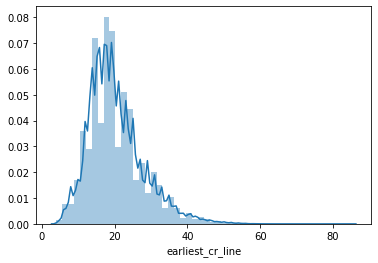

In [38]:
# histogram of credit file years

sns.distplot(x);

In [39]:
loan_filtered['earliest_cr_line'] = x # replacing the variable, now is numeric
del x

'home_ownership' has a lot of categories, when we will go to make dummies it will return us so many variables, in order to prevent it, we will reduce the dimension of this variable rencoding it.

In [40]:
loan_filtered['home_ownership'].value_counts()

MORTGAGE    493699
RENT        398309
OWN         107600
ANY            209
OTHER          141
NONE            42
Name: home_ownership, dtype: int64

In [41]:
loan_filtered['home_ownership'] = np.where((loan_filtered['home_ownership'] != 'OWN') & (loan_filtered['home_ownership'] != 'RENT'),
                                    'OTHER', loan_filtered['home_ownership'].values)

In [42]:
loan_filtered['home_ownership'].value_counts()

OTHER    494091
RENT     398309
OWN      107600
Name: home_ownership, dtype: int64

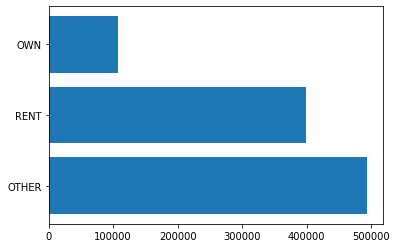

In [43]:
# barplot of homeownership

height = loan_filtered['home_ownership'].value_counts()
bars = ('OTHER', 'RENT', 'OWN')
y_pos = np.arange(len(bars))

# Create horizontal bars
plt.barh(y_pos, height)
 
# Create names on the y-axis
plt.yticks(y_pos, bars)
 
# Show graphic
plt.show()

The next step will be rencoding the variable 'emp_length', now we have 11 different values, we are going to rencode the variable ir order to have only 2 different values:
* From less than 1 year to 5 years.
* From 6 years to 10 years or more.

In [44]:
loan_filtered['emp_length'].value_counts()

10+ years    386411
2 years       90568
< 1 year      80738
3 years       80173
1 year        65798
5 years       62543
4 years       59661
6 years       46767
8 years       45173
7 years       44401
9 years       37767
Name: emp_length, dtype: int64

In [45]:
loan_filtered['emp_length'] = np.where((loan_filtered['emp_length'] == '< 1 year') | 
                                       (loan_filtered['emp_length'] == '1 year') |
                                       (loan_filtered['emp_length'] == '2 years') | 
                                       (loan_filtered['emp_length'] == '3 years') | 
                                       (loan_filtered['emp_length'] == '4 years') | 
                                       (loan_filtered['emp_length'] == '5 years'), 
                                       '<= 5 years', '6+ years')

We view the new values.

In [46]:
loan_filtered['emp_length'].value_counts()

6+ years      560519
<= 5 years    439481
Name: emp_length, dtype: int64

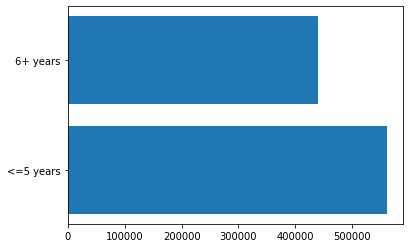

In [47]:
# barplot of emp_length

height = loan_filtered['emp_length'].value_counts()
bars = ('<=5 years', '6+ years')
y_pos = np.arange(len(bars))

# Create horizontal bars
plt.barh(y_pos, height)
 
# Create names on the y-axis
plt.yticks(y_pos, bars)
 
# Show graphic
plt.show()

In order to maintain the variable 'grade' and do not create as dummies as categories has the variable, we will apply an ordinal encondig to the variable. The method will be the following:
* We have 7 categories from best grade, 'A', to the worst grade 'G'.
* The order is A > B > C > D > E > F > G.
* The new encoding will be 6 > 5 > 4 > 3 > 2 > 1 > 0

In [48]:
loan_filtered['grade'].value_counts()

B    289933
C    285116
A    170956
D    151373
E     70960
F     24500
G      7162
Name: grade, dtype: int64

In [49]:
# first we create a mapper

mapper = {'A': 6, 'B': 5, 'C': 4, 'D': 3, 'E': 2, 'F': 1, 'G': 0}

# now we map the column and replace the values

loan_filtered['grade'] = loan_filtered['grade'].replace(mapper)

According to some financial papers, the loan purpose can serve as a method to decide the risk of the loan. We are going to see the different values of our variable 'purpose'.

In [50]:
loan_filtered['purpose'].value_counts()

debt_consolidation    580649
credit_card           218329
home_improvement       64945
other                  58032
major_purchase         21868
small_business         11754
medical                11648
car                    10778
moving                  7100
vacation                6656
house                   5436
wedding                 1767
renewable_energy         709
educational              329
Name: purpose, dtype: int64

How does affect the purpose in our target?

In [51]:
loan_filtered.groupby('purpose')['target'].value_counts()

purpose             target
car                 0           9016
                    1           1762
credit_card         0         178262
                    1          40067
debt_consolidation  0         448162
                    1         132487
educational         0            257
                    1             72
home_improvement    0          52248
                    1          12697
house               0           4124
                    1           1312
major_purchase      0          17422
                    1           4446
medical             0           8871
                    1           2777
moving              0           5293
                    1           1807
other               0          44529
                    1          13503
renewable_energy    0            517
                    1            192
small_business      0           8041
                    1           3713
vacation            0           5258
                    1           1398
wedding    

We need to reduce the number of types, so we will create new 6 new types in which they will be aggregate the currently types. 

* debt_consolidation: 'debt_consolidation'.
* home: which will include 'home_improvement', 'house' and 'moving'.
* purchase: includes 'credit_card', 'major_purchase', 'vacation', 'car' and 'wedding'.
* investment: includes 'small_business' and 'renewable_energy'.
* medical: 'medical'.
* other: includes 'other' and 'educational'.

In [52]:
# home

loan_filtered['purpose'] = np.where((loan_filtered['purpose'] == 'home_improvement') | 
                                    (loan_filtered['purpose'] == 'house') | 
                                    (loan_filtered['purpose'] == 'moving'), 
                                   'home', loan_filtered['purpose'].values)

In [53]:
# purchase

loan_filtered['purpose'] = np.where((loan_filtered['purpose'] == 'credit_card') | 
                                    (loan_filtered['purpose'] == 'major_purchase') | 
                                    (loan_filtered['purpose'] == 'vacation') | 
                                    (loan_filtered['purpose'] == 'wedding') |
                                    (loan_filtered['purpose'] == 'car'), 
                                   'purchase', loan_filtered['purpose'].values)

In [54]:
# investment

loan_filtered['purpose'] = np.where((loan_filtered['purpose'] == 'small_business') | 
                                    (loan_filtered['purpose'] == 'renewable_energy'), 
                                   'investment', loan_filtered['purpose'].values)

In [55]:
# other

loan_filtered['purpose'] = np.where((loan_filtered['purpose'] == 'other') | 
                                    (loan_filtered['purpose'] == 'educational'), 
                                   'other', loan_filtered['purpose'].values)

In [56]:
loan_filtered['purpose'].value_counts()

debt_consolidation    580649
purchase              259398
home                   77481
other                  58361
investment             12463
medical                11648
Name: purpose, dtype: int64

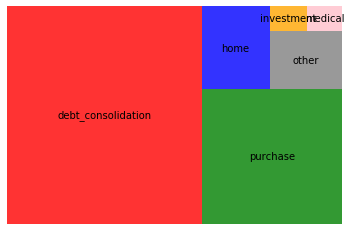

In [57]:
df = pd.DataFrame({'purpose':loan_filtered['purpose'].value_counts(), 'group':["debt_consolidation", 
                                                                                 "purchase", "home", "other", 
                                                                                 "investment", "medical"] })
import squarify 
squarify.plot(sizes=df['purpose'], label=df['group'], color=["red","green","blue", "grey", "orange", "pink"], alpha=.8)
plt.axis('off')
plt.show()

There are some variables in our dataset, e.g 'pymnt_plan' or 'hardship_flag', which by themselves are dummies, we only need to rencode them ir order to change their types from categorical to numeric.

In [58]:
loan_filtered.groupby('initial_list_status')['target'].value_counts()

initial_list_status  target
f                    0         334284
                     1          86482
w                    0         449251
                     1         129983
Name: target, dtype: int64

In [59]:
# fractioned

86482/(86482+334284)

0.20553466772505383

In [60]:
# whole

129983/(129983+449251)

0.22440499003856818

'initial_list_status' give us information about if the lending club offered the whole loan to the borrower or only a fraction of the loan. Independently of that, we want to know if the borrower will pay the loan. We do not mind if the loan was given fully or partially. Also, we can see that the percentage of defaults its similar in both types of status.

In [61]:
del loan_filtered['initial_list_status']

In [62]:
loan_filtered.groupby('disbursement_method')['target'].value_counts()

disbursement_method  target
Cash                 0         780103
                     1         215109
DirectPay            0           3432
                     1           1356
Name: target, dtype: int64

In [63]:
# cash

215109/(215109+780103)

0.21614389697873418

In [64]:
# direct pay

1356/(1356+3432)

0.2832080200501253

According to the same reason we delete 'disbursement_method'.

In [65]:
del loan_filtered['disbursement_method']

Due to all the transformations done, the index of the dataframe has changed and it does not follow the typical sequency of numbers, so we will reset the index to avoid future problems.

In [66]:
loan_filtered = loan_filtered.reset_index(drop = True)

In [67]:
categoricas = loan_filtered.select_dtypes(include = [np.object])
categoricas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
term                   1000000 non-null object
emp_length             1000000 non-null object
home_ownership         1000000 non-null object
verification_status    1000000 non-null object
purpose                1000000 non-null object
application_type       1000000 non-null object
dtypes: object(6)
memory usage: 45.8+ MB


In [68]:
numericas = loan_filtered.select_dtypes(include = [np.number])
numericas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 77 columns):
loan_amnt                         1000000 non-null int64
int_rate                          1000000 non-null float64
installment                       1000000 non-null float64
annual_inc                        1000000 non-null float64
desc                              1000000 non-null int64
dti                               1000000 non-null float64
delinq_2yrs                       1000000 non-null float64
inq_last_6mths                    1000000 non-null float64
mths_since_last_delinq            1000000 non-null float64
mths_since_last_record            1000000 non-null float64
open_acc                          1000000 non-null float64
pub_rec                           1000000 non-null float64
revol_bal                         1000000 non-null int64
revol_util                        1000000 non-null float64
total_acc                         1000000 non-null float64
recoverie

At this moment we have our dataset clean, filtered and dimensionally reduced, so we can continue with other instances.

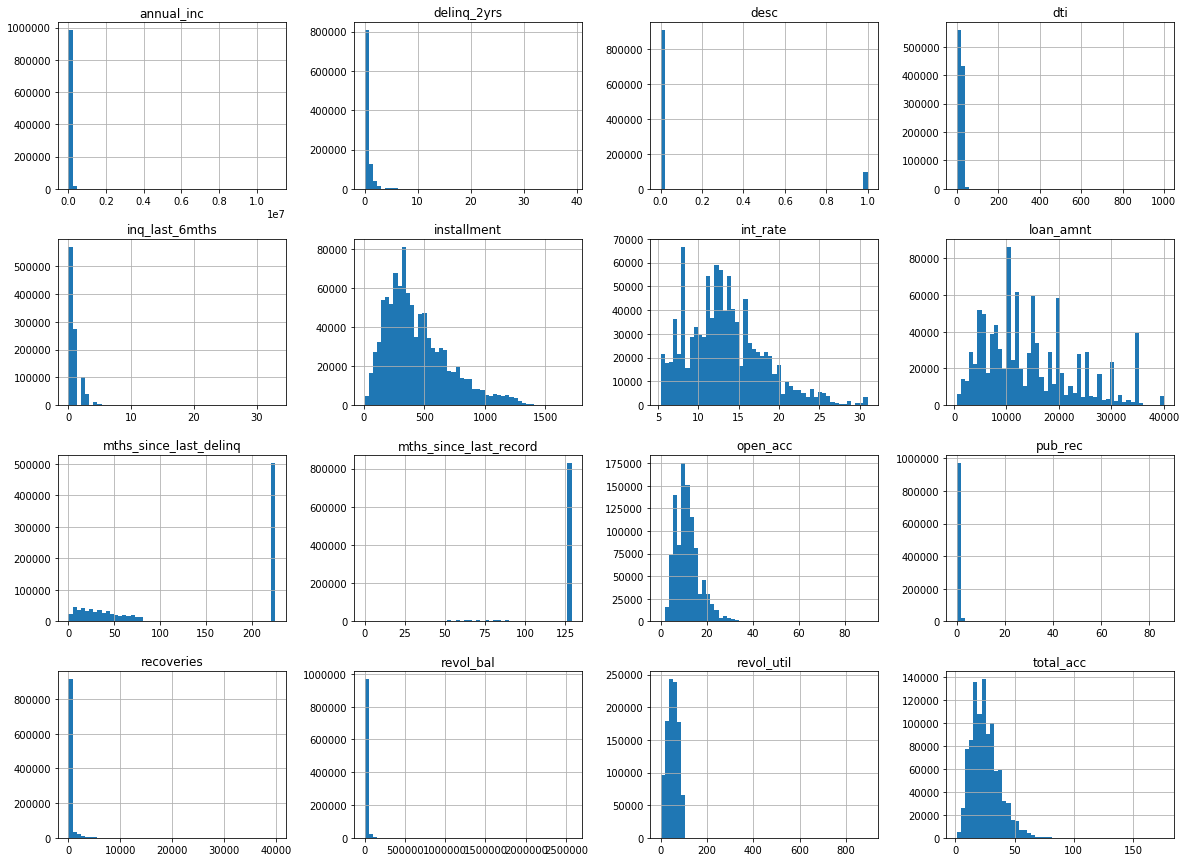

In [69]:
numericas.iloc[:,0:16].hist(bins=50, figsize=(20,15))
plt.show()

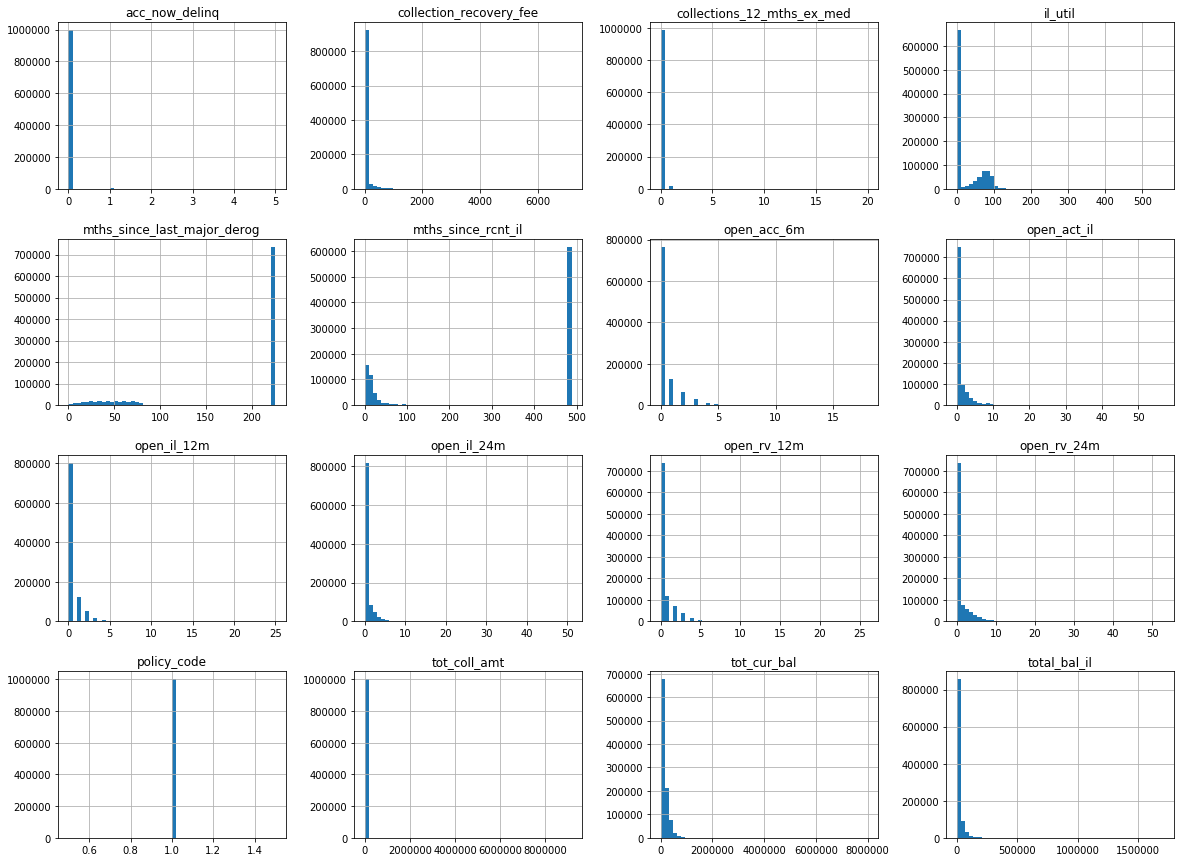

In [70]:
numericas.iloc[:,16:32].hist(bins=50, figsize=(20,15))
plt.show()

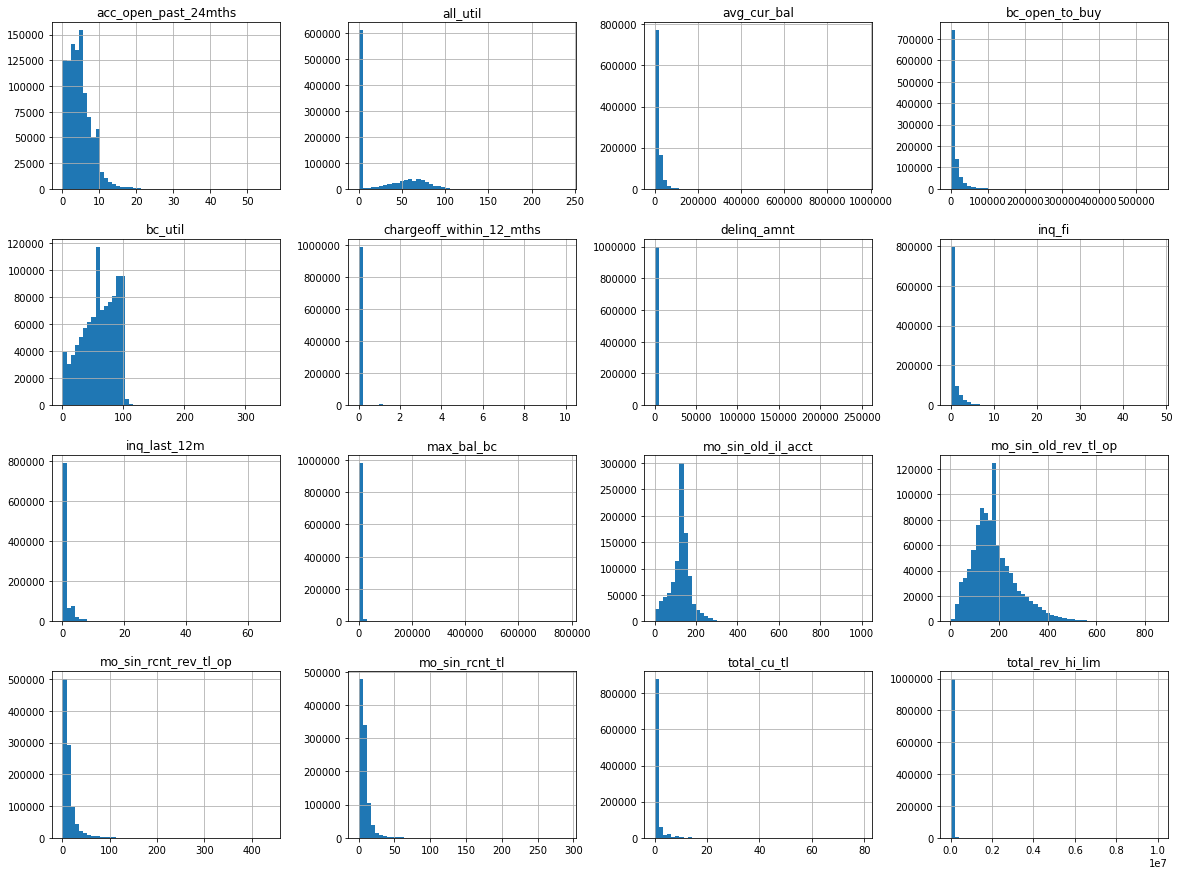

In [71]:
numericas.iloc[:,32:48].hist(bins=50, figsize=(20,15))
plt.show()

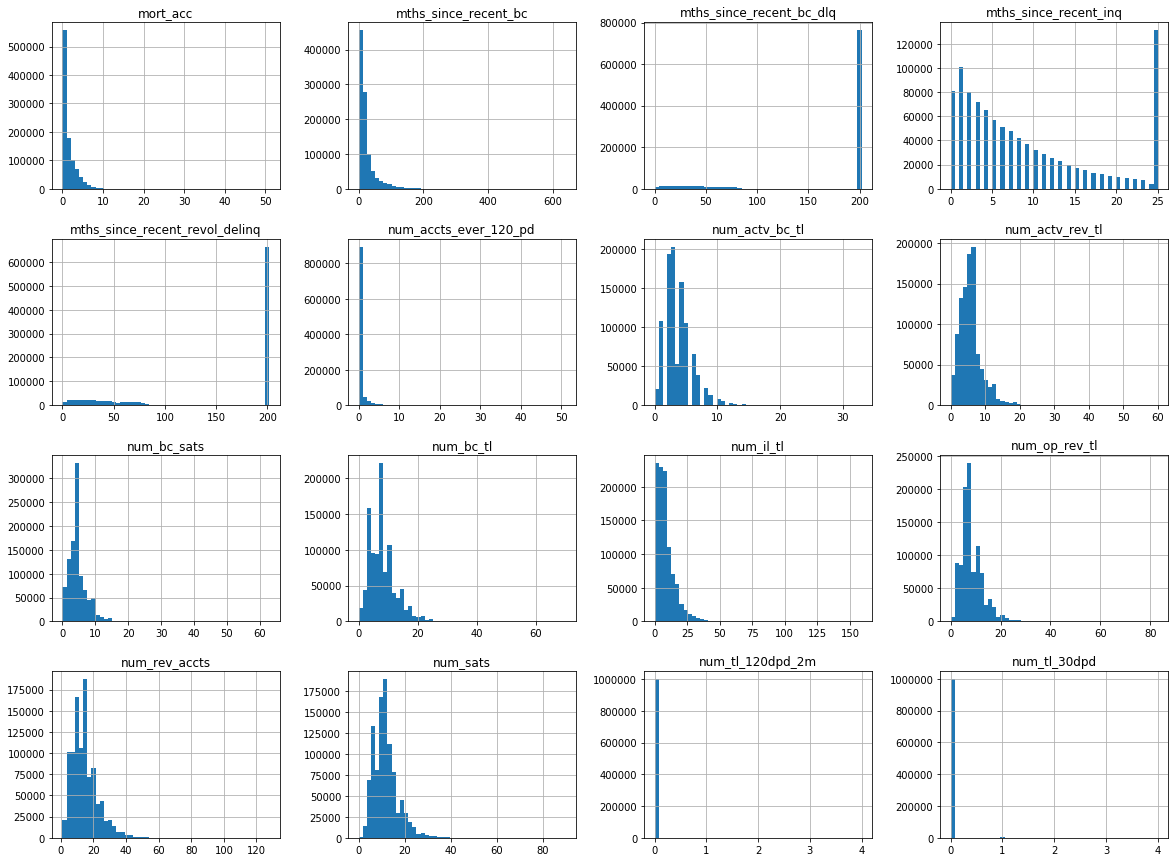

In [72]:
numericas.iloc[:,48:64].hist(bins=50, figsize=(20,15))
plt.show()

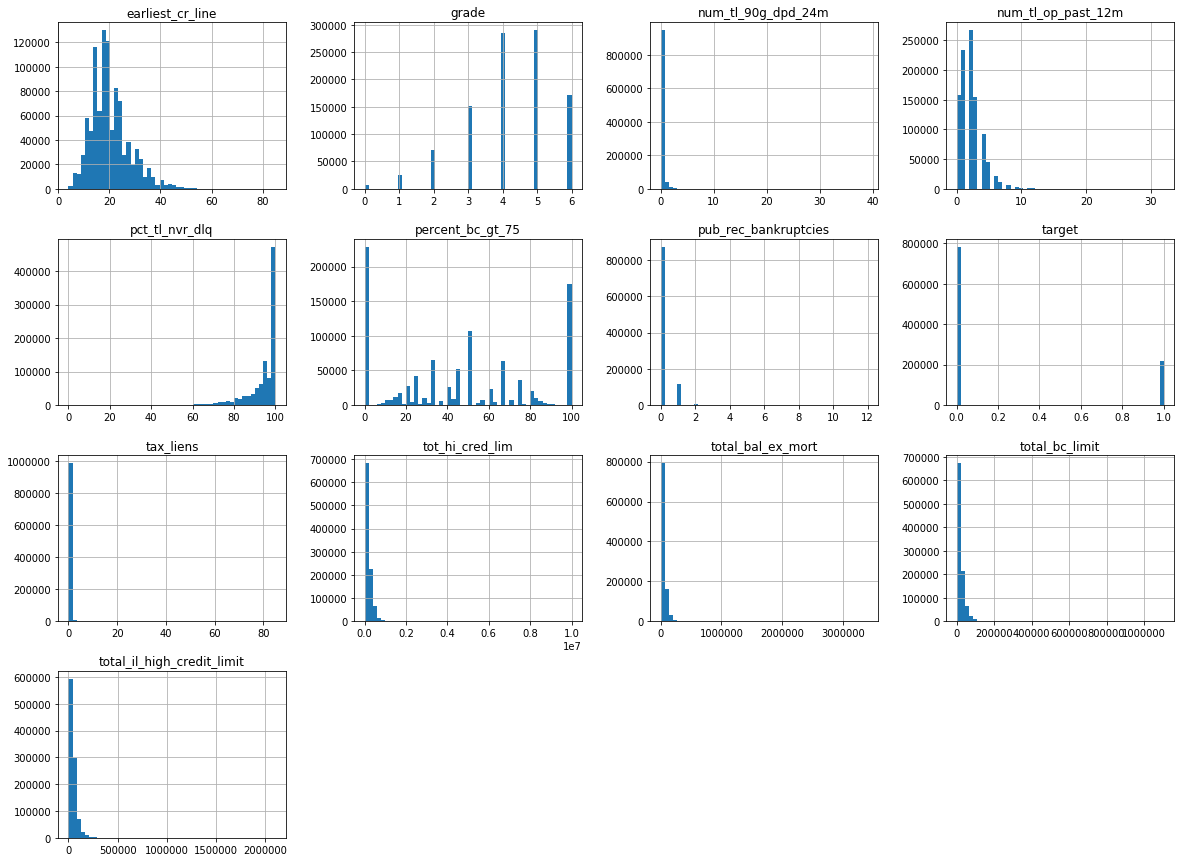

In [73]:
numericas.iloc[:,64:].hist(bins=50, figsize=(20,15))
plt.show()

### 4.1 Outliers 

The method we will use for detecting outliers is called Isolation Forest. It explicitly isolates anomalies constructing normal points and regions by assigning a score to each data point. It takes advantage of the fact that anomalies are the minority data points and that they have attribute-values that are very different from those of normal instances. This algorithm works great with very high dimensional datasets and it proved to be a very effective way of detecting anomalies. 

In [74]:
IF = IsolationForest(max_samples = 100, contamination = 0.05, bootstrap = False, random_state = 1)

In [75]:
%%time

outliers = IF.fit_predict(numericas)
outliers

Wall time: 4min 42s


array([1, 1, 1, ..., 1, 1, 1])

This method is very interesting but, why a sample is considered as an outlier by Isolation Forest? We will extract the first outlier was calculated and see if it is really an outlier.

In [76]:
primer_outlier = pd.DataFrame({"Variable":numericas.iloc[1].index, "Valores": numericas.iloc[1]}).set_index("Variable")
primer_outlier

,Valores
Variable,
loan_amnt,4000.00
int_rate,9.17
installment,127.52
annual_inc,35000.00
desc,0.00
...,...
total_bc_limit,3800.00
total_il_high_credit_limit,1200.00
target,0.00


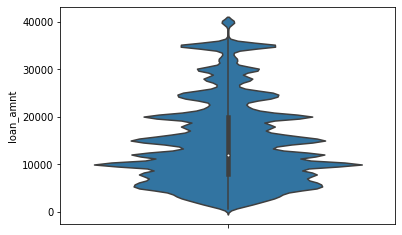

In [77]:
sns.violinplot( y=numericas["loan_amnt"] );

The loan amount of our outlier is 40 000, it is in the top of the violinplot. According to this variable it could be considered as an outlier.

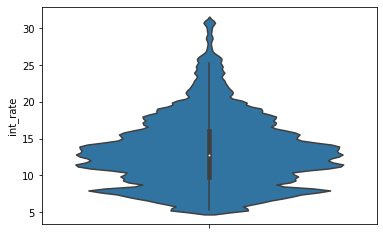

In [78]:
sns.violinplot( y=numericas["int_rate"] );

The interest rate is 9.17%, it is not a high interest rate in comparison withe the rest of the dataset.

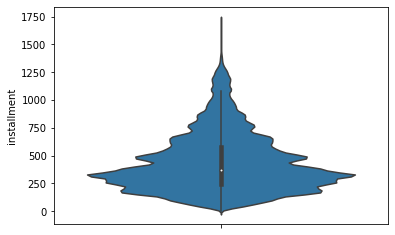

In [79]:
sns.violinplot( y=numericas["installment"] );

The monthly payment if the loan was conceed, 127.52, is too small so it could be considered as an outlier.

The loan amount is a clear evidence to consider that sample as an outlier, also we have 2 more variables in addition which have very different values in comparison to the rest of the dataset. 

First we check both lists have the same length.

In [80]:
len(numericas)

1000000

In [81]:
len(outliers)

1000000

The Isolation Forest returns us an array with 1 and -1. -1 indicates an outlier, so we need to know their index positions in order to delete the samples from the numerical dataframe.

In [82]:
# I do a loop in order to get the index of every -1

indices_outliers = []
for i in range(0,len(outliers)):
    if outliers[i] == -1:
        indices_outliers.append(i)

        
len(indices_outliers)

50000

According to the results we have 50 000 outliers. We have a list of the index of every row considered as an outliers, we drop them of the dataset.

In [83]:
# deletting outliers

loan_filtered.drop(indices_outliers, axis = 0, inplace = True)

# reseting the index

loan_filtered = loan_filtered.reset_index(drop = True)

# creating again numericas and categoricas

numericas = loan_filtered.select_dtypes(include = [np.number])

categoricas = loan_filtered.select_dtypes(include = [np.object])

In [84]:
numericas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950000 entries, 0 to 949999
Data columns (total 77 columns):
loan_amnt                         950000 non-null int64
int_rate                          950000 non-null float64
installment                       950000 non-null float64
annual_inc                        950000 non-null float64
desc                              950000 non-null int64
dti                               950000 non-null float64
delinq_2yrs                       950000 non-null float64
inq_last_6mths                    950000 non-null float64
mths_since_last_delinq            950000 non-null float64
mths_since_last_record            950000 non-null float64
open_acc                          950000 non-null float64
pub_rec                           950000 non-null float64
revol_bal                         950000 non-null int64
revol_util                        950000 non-null float64
total_acc                         950000 non-null float64
recoveries               

In [85]:
categoricas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950000 entries, 0 to 949999
Data columns (total 6 columns):
term                   950000 non-null object
emp_length             950000 non-null object
home_ownership         950000 non-null object
verification_status    950000 non-null object
purpose                950000 non-null object
application_type       950000 non-null object
dtypes: object(6)
memory usage: 43.5+ MB


### 4.2 Making dummies 

These variables are going to be converted to dummies.

In [86]:
list(categoricas)

['term',
 'emp_length',
 'home_ownership',
 'verification_status',
 'purpose',
 'application_type']

In [87]:
dummies = pd.get_dummies(categoricas)
dummies.head()

,term_ 36 months,term_ 60 months,emp_length_6+ years,emp_length_<= 5 years,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_debt_consolidation,purpose_home,purpose_investment,purpose_medical,purpose_other,purpose_purchase,application_type_Individual,application_type_Joint App
0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0
1,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0
2,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0
3,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0
4,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0


In [88]:
dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950000 entries, 0 to 949999
Data columns (total 18 columns):
term_ 36 months                        950000 non-null uint8
term_ 60 months                        950000 non-null uint8
emp_length_6+ years                    950000 non-null uint8
emp_length_<= 5 years                  950000 non-null uint8
home_ownership_OTHER                   950000 non-null uint8
home_ownership_OWN                     950000 non-null uint8
home_ownership_RENT                    950000 non-null uint8
verification_status_Not Verified       950000 non-null uint8
verification_status_Source Verified    950000 non-null uint8
verification_status_Verified           950000 non-null uint8
purpose_debt_consolidation             950000 non-null uint8
purpose_home                           950000 non-null uint8
purpose_investment                     950000 non-null uint8
purpose_medical                        950000 non-null uint8
purpose_other                      

In [89]:
# deletting the original variables to the dataset

del loan_filtered['term']
del loan_filtered['emp_length']
del loan_filtered['home_ownership']
del loan_filtered['verification_status']
del loan_filtered['purpose']
del loan_filtered['application_type']

In [90]:
dummies['target'] = loan_filtered['target']
dummies['desc'] = loan_filtered['desc']
dummies['grade'] = loan_filtered['grade']

### 4.3 Scaling

Before concatenating the dummies we will scale the numeric variables of the dataset, we are going to use the Standard method.

In [91]:
del numericas['target']
del numericas['desc']
del numericas['grade']

In [92]:
sc = StandardScaler()
num_scaled = sc.fit_transform(numericas)
num_scaled = pd.DataFrame(num_scaled, columns = numericas.columns)

In [93]:
num_scaled.head(10)

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,earliest_cr_line
0,0.662751,1.494076,0.382284,-0.172057,0.158557,0.938666,0.384337,-1.227805,0.397505,1.560443,...,0.557541,0.143465,0.974933,-0.354075,-0.119774,-0.239126,-0.457511,-0.662128,-0.249310,-0.688639
1,-1.195200,-0.862249,-1.191234,-0.567631,-1.060041,-0.370282,-0.680940,0.961941,0.397505,-1.243822,...,-0.047412,0.684600,-1.305244,-0.354075,-0.119774,-0.987159,-1.056284,-0.882313,-1.017492,-1.618679
2,-0.492982,-1.133558,-0.464256,-0.201359,-1.149479,-0.370282,-0.680940,0.961941,0.397505,-1.644431,...,0.064130,-0.019995,-0.014957,-0.354075,-0.119774,0.060947,0.073032,0.047976,0.061541,-0.821502
3,-1.253718,-0.584532,-1.245387,0.025730,-0.124664,-0.370282,0.384337,-0.938593,0.397505,0.959529,...,1.767447,-0.313493,-1.305244,-0.354075,-0.119774,0.534851,-0.355360,-0.379033,0.158076,-0.821502
4,-0.229651,2.944616,-0.224740,-0.218896,0.738043,-0.370282,-0.680940,0.961941,-0.769116,-1.043517,...,-0.047412,0.684600,0.832422,2.319319,-0.119774,-0.690939,0.194608,-0.766978,0.302479,-1.220091
5,-0.071652,0.808328,0.209823,-0.391820,0.468796,-0.370282,0.384337,-1.124515,0.397505,-0.041994,...,0.557541,-0.169190,1.544977,-0.354075,-0.119774,-0.892211,-0.717293,-0.798433,-0.768687,-0.821502
6,-0.492982,-1.031016,-0.455590,-0.421122,-1.349784,-0.370282,-0.680940,0.961941,0.397505,-1.644431,...,-0.652365,0.684600,-0.356120,-0.354075,-0.119774,-0.988447,-1.037366,-0.499610,-1.049113,-1.087228
7,0.864639,-0.919929,0.998248,0.941410,0.002040,-0.370282,-0.680940,0.961941,0.397505,0.158311,...,-0.047412,0.684600,-0.165156,-0.354075,-0.119774,0.609660,0.855929,0.444040,1.381155,1.570029
8,0.677381,0.393888,1.029344,0.457931,-0.178700,-0.370282,-0.680940,0.961941,0.397505,0.158311,...,-0.047412,0.684600,0.119867,-0.354075,-0.119774,-0.546230,0.138662,1.062655,-0.185856,-0.954365
9,-0.024837,0.594699,0.238527,-0.421122,-0.791726,0.938666,0.384337,-1.310437,0.397505,-1.043517,...,-0.047412,0.011188,-1.305244,-0.354075,-0.119774,-0.847396,-0.784920,0.648497,-1.049113,-0.290051


In [94]:
# concatenating the dummies

loan_filtered_final = pd.merge(num_scaled, dummies, left_index=True, right_index=True)
loan_filtered_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950000 entries, 0 to 949999
Data columns (total 95 columns):
loan_amnt                              950000 non-null float64
int_rate                               950000 non-null float64
installment                            950000 non-null float64
annual_inc                             950000 non-null float64
dti                                    950000 non-null float64
delinq_2yrs                            950000 non-null float64
inq_last_6mths                         950000 non-null float64
mths_since_last_delinq                 950000 non-null float64
mths_since_last_record                 950000 non-null float64
open_acc                               950000 non-null float64
pub_rec                                950000 non-null float64
revol_bal                              950000 non-null float64
revol_util                             950000 non-null float64
total_acc                              950000 non-null float64
recover

In [95]:
loan_filtered_final.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,...,purpose_home,purpose_investment,purpose_medical,purpose_other,purpose_purchase,application_type_Individual,application_type_Joint App,target,desc,grade
0,0.662751,1.494076,0.382284,-0.172057,0.158557,0.938666,0.384337,-1.227805,0.397505,1.560443,...,0,0,0,0,0,1,0,0,0,2
1,-1.195200,-0.862249,-1.191234,-0.567631,-1.060041,-0.370282,-0.680940,0.961941,0.397505,-1.243822,...,0,0,0,0,0,1,0,0,0,5
2,-0.492982,-1.133558,-0.464256,-0.201359,-1.149479,-0.370282,-0.680940,0.961941,0.397505,-1.644431,...,0,0,0,0,0,1,0,0,1,6
3,-1.253718,-0.584532,-1.245387,0.025730,-0.124664,-0.370282,0.384337,-0.938593,0.397505,0.959529,...,0,0,0,1,0,1,0,0,0,5
4,-0.229651,2.944616,-0.224740,-0.218896,0.738043,-0.370282,-0.680940,0.961941,-0.769116,-1.043517,...,0,0,0,0,0,1,0,1,0,1


In [96]:
loan_filtered_final.to_csv('../data/DE_set.csv', index = None, header=True)